#### **Exercise 1:**

The `titanic` dataset is widely used in ML courses.  The 'stakeholder problem' is to predict whether or not a person was likely to survive given the available data.  We'll use it here for a few problems to get used to pre-processing. First, let's do some EDA.  Load the data in and use a scatter plot matrix to visualize just the numeric columns.  Look critically at your results.  What have you learned?  What would you like to know that this analysis doesn't tell you?

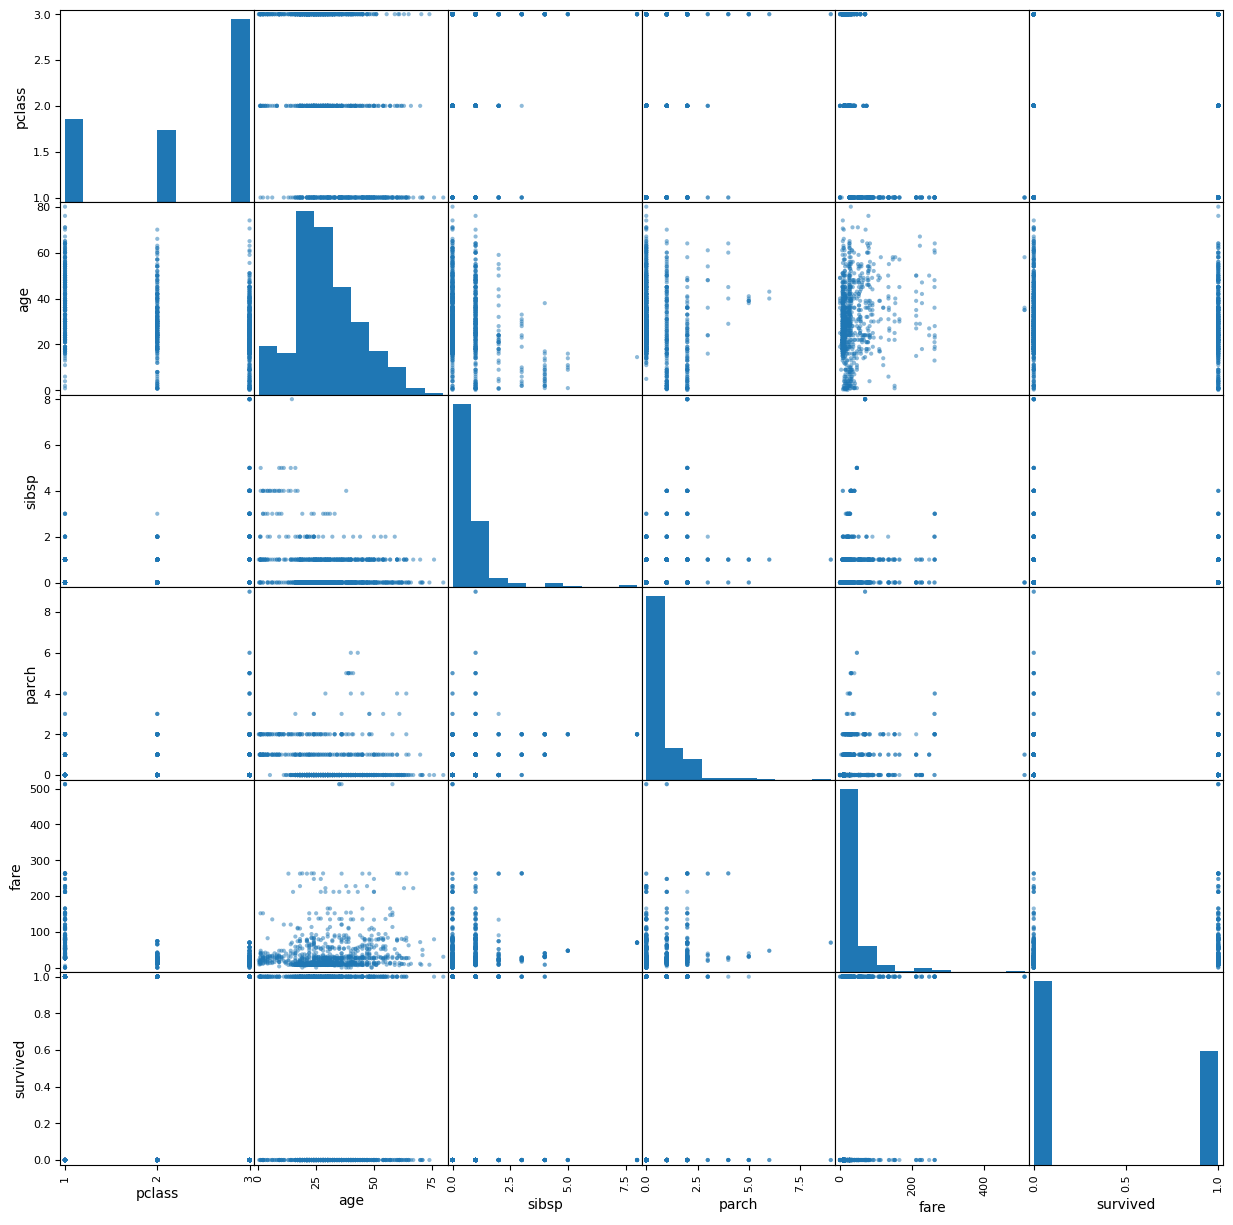

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("data/titanic.csv")
pd.plotting.scatter_matrix(data,figsize=(15,15))
plt.show()

#### **Exercise 2:**

It's zero cost to build a scatter matrix, but sometimes it only helps to highlight what you *don't* know. In addition to identifying correlations (or lack thereof) we'd also like to get a sense of the predictive power of different features.  Figure out how to use histogram plots to look at survival rates by age, pclass, and gender.

array([<Axes: title={'center': '0'}, ylabel='Frequency'>,
       <Axes: title={'center': '1'}, ylabel='Frequency'>], dtype=object)

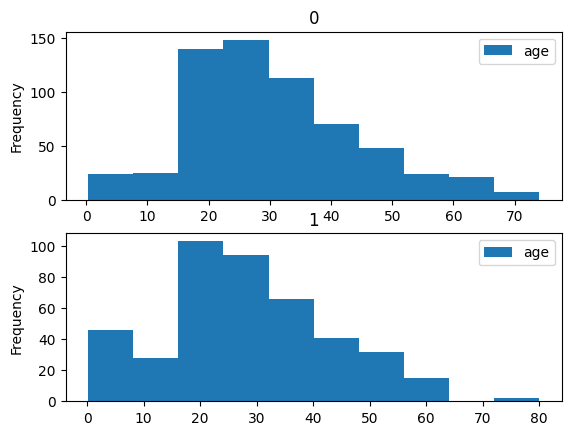

In [ ]:
data[["age","survived"]].plot.hist(by="survived")

array([<Axes: title={'center': '1'}, ylabel='Frequency'>,
       <Axes: title={'center': '2'}, ylabel='Frequency'>,
       <Axes: title={'center': '3'}, ylabel='Frequency'>], dtype=object)

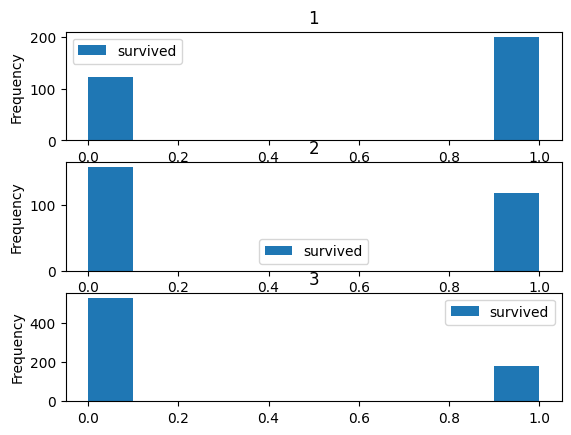

In [ ]:
data[["pclass","survived"]].plot.hist(by="pclass")

array([<Axes: title={'center': 'False'}, ylabel='Frequency'>,
       <Axes: title={'center': 'True'}, ylabel='Frequency'>], dtype=object)

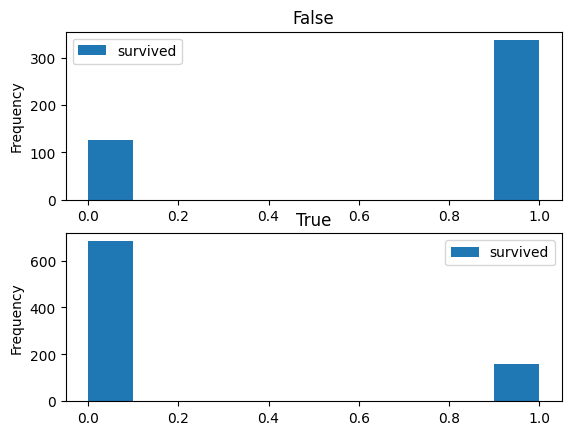

In [ ]:
import pandas as pd
data_1=pd.concat([data,pd.get_dummies(data[['sex']],drop_first=True)],axis=1)
data_1[["sex_male","survived"]].plot.hist(by="sex_male")

#### **Exercise 3:**

Examine your data for NAs. 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


The following exercises use 2019 flight statistics from the United States Department of Transportation’s Bureau of Transportation Statistics (available [here](https://www.transtats.bts.gov/DL_SelectFields.asp?gnoyr_VQ=FMF&QO_fu146_anzr=Nv4%20Pn44vr45) and in this repository as `data/T100_MARKET_ALL_CARRIER.zip`). Each row contains information about a specific route for a given carrier in a given month (e.g., JFK &rarr; LAX on Delta Airlines in January). There are 321,409 rows and 41 columns. Note that you don't need to unzip the file to read it in with `pd.read_csv()`.

#### __Exercise 4__:

Read in the data and convert the column names to lowercase to make them easier to work with.

In [3]:
import pandas as pd

df = pd.read_csv('../../master-lectures/2-week2/data/T100_MARKET_ALL_CARRIER.zip').rename(lambda x: x.lower(), axis=1)
df.head()

,passengers,freight,mail,distance,unique_carrier,airline_id,unique_carrier_name,unique_carrier_entity,region,carrier,...,dest_state_nm,dest_country,dest_country_name,dest_wac,year,quarter,month,distance_group,class,data_source
0,0.0,53185.0,0.0,8165.0,EK,20392,Emirates,9678A,I,EK,...,Texas,US,United States,74,2019,1,3,17,G,IF
1,0.0,9002.0,0.0,6849.0,EK,20392,Emirates,9678A,I,EK,...,New York,US,United States,22,2019,1,3,14,G,IF
2,0.0,2220750.0,0.0,7247.0,EK,20392,Emirates,9678A,I,EK,...,Illinois,US,United States,41,2019,1,3,15,G,IF
3,0.0,1201490.0,0.0,8165.0,EK,20392,Emirates,9678A,I,EK,...,NaN,AE,United Arab Emirates,678,2019,1,3,17,G,IF
4,0.0,248642.0,0.0,6849.0,EK,20392,Emirates,9678A,I,EK,...,NaN,AE,United Arab Emirates,678,2019,1,3,14,G,IF


#### __Exercise 5__:

What columns are in the data?


In [ ]:
df.columns

#### __Exercise 6__:

How many distinct carrier names are in the dataset?

In [ ]:
df.unique_carrier_name.nunique()

#### __Exercise 7__:

Calculate the totals of the `freight`, `mail`, and `passengers` columns for flights from the United Kingdom to the United States.

In [5]:
df.query(
    'origin_country_name == "United Kingdom" and dest_country_name == "United States"'
)[['freight', 'mail', 'passengers']].sum()

# Alternatively
#df[(df.origin_country_name == "United Kingdom") & (df.dest_country_name == "United States")][['freight', 'mail', 'passengers']].sum()

freight       903296879.0
mail           29838395.0
passengers     10685608.0
dtype: float64

#### __Exercise 8__:

Find the top 5 carriers for median route distance (i.e., for all origin-destination pairs that each carrier has, find the median distance after removing duplicates).

In [ ]:
df[['unique_carrier_name', 'origin', 'dest', 'distance']].drop_duplicates()\
    .groupby('unique_carrier_name').distance.median().nlargest(5)

#### __Exercise 9:__ 
Find the total cargo transported (mail + freight) and mean distance traveled for the 10 carriers that transported the most cargo.

In [ ]:
df.assign(cargo=lambda x: x.mail + x.freight)\
    .groupby('unique_carrier_name')[['cargo', 'distance']]\
    .agg(dict(cargo='sum', distance='mean')).nlargest(10, 'cargo')

#### __Exercise 10__:

Which 10 carriers flew the most passengers out of the United States to another country?

In [ ]:
top_10_by_passengers = df\
    .query('origin_country_name == "United States" and dest_country_name != "United States"')\
    .groupby('unique_carrier_name').passengers.sum().nlargest(10)
top_10_by_passengers